<a href="https://colab.research.google.com/github/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/curso_exposoma_modulo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción al concepto del Exposoma y sus metodologías. Sesión 4 - "Estrategias para el análisis de datos de Exposoma."**  

<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/isglobal.png?raw=1" alt="ISGlobal logo" width="300"/>  

<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/exposoma.png?raw=1" alt="ISGlobal logo" width="500"/>

**Alan Domínguez**, Investigador Predoctoral del Instituto de Salud Global de Barcelona - ISGlobal.  
**Augusto Anguita-Ruiz**, Investigador Postdoctoral del Instituto de Salud Global de Barcelona - ISGlobal.  

El exposoma, descrito como "la totalidad de las exposiciones ambientales humanas desde la concepción en adelante", reconoce que los individuos estamos expuestos simultaneamente a multiples factores ambientales diferentes adoptando un efoque holístico para el descubrimento de factores etiológicos de la enfermedad. La ventaja prinicipal del enfoque del exposoma sobre otros más tradicionales "una exposición, una enfermedad o desenlace de salud" es que proporciona un framework para el estudio de múltiples riesgos ambientales (urbanos, químicos, estilo de vida, sociales, etc...) y sus efectos combinados.

El **objetivo** de esta sesión es ofrecer una **introducción a los distintos abordajes estadístico**s necesarios para responder a las principales cuestiones de investigación en exposoma, por lo que esta sesión se :

**1.- Análisis descriptivo:**  En una primera parte de la sesión se trabajará sobre el concepto de análisis descriptivo en exposómica, mediante el cual se extraen las primeras conclusiones sobre los datos. Entre otros objetivos, el análisis descriptivo persigue identificar posibles valores anómalos, factores de confusión o variables que requieran de transformaciones previas al análisis. A su vez, el análisis descriptivo permite comparar preliminarmente los grupos experimentales objeto de estudio, estudiar los patrones de correlación existentes entre factores de exposición, e identificar fenómenos de agrupación en los datos (tanto a nivel de individuos como de características). Todos ellos, pasos imprescindibles para elegir el abordaje estadístico posterior más adecuado.

**2.- Análisis de asociación:** El análisis de asociación persigue la identificación de los posibles factores de exposición ambiental asociados con distintos parámetros de salud. En este bloque de la sesión se presentarán por lo tanto distintos abordajes analíticos holísticos centrados en el estudio de los efectos de múltiples factores de exposición y sus mezclas sobre la salud. Esto incluye principalmente modelos como el ExWAS (Exposome-Wide Association Analysis), u otros para el estudio de interacciones, o fenómenos de no linealidad (e.g., Bayesian Kernel Machine Regression). También se presentará una introducción a los métodos de clustering o mezclas de exposición (e.g., Weighted Quantile Sum Regression). Durante su estudio, se introducirán conceptos de gran importancia en el análisis del exposoma como son la selección de características o la corrección de testeo múltiple.


# **Recordatorio: Introducción a NoteBook**

Dentro de este cuaderno (*NoteBook*), se le guiará paso a paso desde la carga de un conjunto de datos hasta el análisis descriptivo de su contenido.

El cuaderno de *Jupyter* (Python) es un enfoque que combina bloques de texto (como éste) junto con bloques o celdas de código. La gran ventaja de este tipo de celdas, es su interactividad, ya que pueden ser ejecutadas para comprobar los resultados directamente sobre las mismas. *Muy importante*: **el orden las instrucciones es fundamental**, por lo que cada celda de este cuaderno debe ser ejecutada secuencialmente. En caso de omitir alguna, puede que el programa lance un error, así que se deberá comenzar desde el principio en caso de duda.

Antes de nada:

Es **muy muy importante** que al comienzo se seleccione **"*Abrir en modo de ensayo*" (draft mode)**, arriba a la izquierda. En caso contrario, no permitirá ejecutar ningún bloque de código, por cuestiones de seguridad. Cuando se ejecute el primero de los bloques, aparecerá el siguiente mensaje: "*Advertencia: Este cuaderno no lo ha creado Google.*". No se preocupe, deberá confiar en el contenido del cuaderno (*NoteBook*) y pulsar en "Ejecutar de todos modos".

¡Ánimo!

Haga clic en el botón "play" en la parte izquierda de cada celda de código. Las líneas de código que comienzan con un hashtag (#) son comentarios y no afectan a la ejecución del programa.

También puede pinchar sobre cada celda y hacer "*ctrl+enter*" (*cmd+enter* en Mac).

Cada vez que ejecute un bloque, verá la salida justo debajo del mismo. La información suele ser siempre la relativa a la última instrucción, junto con todos los `print()` (orden para imprimir) que haya en el código.

## **ÍNDICE**

En este *notebook*:
1. Aprenderemos ....
2. Plantearemos sus ....
    
Contenidos:
1. [Instalación del entorno R y sus bibliotecas para el análisis de exposoma](#instalacion-librerias)    
2. [Cargar los datos](#cargar-datos)
4. [Análisis descriptivo del Exposoma](#descriptivo)   
5. [Visualización](#etiquetaD)
6. [ExWAS...](#etiquetaE)  
7. [Mixtures....](#etiquetaF)   
8. [Bibliografía](#etiquetaG)

## **1. Instalación del entorno R y librerias para el análisis del exposoma** <a name="instalacion-librerias"></a>

A continuación, instalamos/cargamos las librerias necesarias para esta sesión. En el contexto de análisis de exposoma, las bibliotecas de R nos ofrecen una manera mucho más cómoda de procesar, manipular y analizar los datos. Algunas de estas bibliotecas: `tidyverse`, `skimr`, `rexposome`, `bkmr`,  `gWQS`.   
  
La instalación de R en nuestro entorno de Google Colab se realizará en el siguiente bloque de código. Hay que recordar que todas las instalaciones de bibliotecas que realicemos en el entorno de Google Colab solo permanecerán activas unas pocas horas, después de las cuales las bibliotecas instaladas se eliminan. Por lo tanto, será necesario que vuelvas a ejecutar los códigos de instalación de bibliotecas de esta sección cuando necesites ejecutar de nuevo notebook pasado este tiempo.

Por último, recordemos que cuando una celda utiliza código de R esto se indica mediante la simbología %%R en los notebooks de Python. Quitándo dicha línea, que sirve para indicar que lo que sigue en el notebook está escrito en R, podríamos ejecutar las mismas instrucciones en cualquier entorno de R distinto al notebook sin problemas. Por ejemplo, en nuestra propia máquina Windows, Linux, MacOS utilizando nuestra instalación local de R y RStudio.

El siguiente trozo de código, correspondiente a la instalación de R, es exclusivo al uso de los notebooks de Colab y sería equivalente a instalar R y RStudio en nuestras máquinas:

In [ ]:
# primero chequeamos la version de R que tenemos
R.Version()

* **Instalar/cargar librerias para la sesión**

Instalaremos/cargaremos las librerias necesarias para la sesión práctica, para esto utilizaremos el paquete `pacman`, este paquete es una herramienta de administración que combina funcionalidades de las funciones `install.packages` + `library`







In [ ]:
install.packages("pacman") # nos permite instalar/cargar paquetes de manera simultanea

Instalaremos `BiocManager` y `rexposome` (estos dos paquetes son fundamentales para el análsis del exposoma), utilizando el siguiente código ya que algunas veces suele tener problemas de compatibilidad con la versión de R (el proceso tarda alrededor de 15 minutos, por lo que se recomienda instalarla durante la sesión teórica.

In [ ]:
if (!requireNamespace("BiocManager", quietly=TRUE))
    install.packages("BiocManager")

packages = c('Biobase', 'mice', 'MultiDataSet', 'lsr', 'FactoMineR',
	'stringr', 'circlize', 'corrplot', 'ggplot2', 'reshape2', 'pryr',
	'scales', 'imputeLCMD', 'scatterplot3d', 'glmnet', 'gridExtra',
	'grid', 'Hmisc', 'gplots', 'gtools', 'S4Vectors'
)
for( pkg in packages ) {
  if( !pkg %in% rownames( installed.packages() ) ) {
    message( "Installing ", pkg )
    BiocManager::install( pkg )
  }
}

In [ ]:
# instalamos rexposome
install.packages("devtools")
devtools::install_github("isglobal-brge/rexposome")

In [ ]:
# para aquellos que tienen una version antigua de R (en el caso de usar Rstudio desktop)
devtools::install_github("isglobal-brge/rexposome", ref="R-3.0")

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("rexposome")

In [ ]:
BiocManager::install("rexposome")

In [99]:
# Añadimos todas las librerias que necesitemos utilizar (si el paquete ya esta instalado, automaticamente cargara el paquete si esta en la funcion pacman::p_load())
pacman::p_load(tidyverse, corrplot, RColorBrewer, skimr, BiocManager, rexposome, bkmr, gWQS, ggridges)

## **2. Cargar los datos** <a name="cargar-datos"></a>

A continuación, se muestran las **líneas de código** necesarias para **cargar** en el entorno de R el conjunto de datos de Exposoma. Para esta sesión práctica utilizaremos datos del estudio de exposoma HELIX. El estudio HELIX es un projecto colaborativo entre seis estudios longitudinales de cohortes de nacimiento basados en la población de seis paises Europeos (Francia, Grecia, Lituania, Noruega, Españana y Reino Unido).

<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/HELIX.png?raw=1" alt="HELIX logo" width="500"/>

**Nota:** Los datos proporcionados en este curso introductorio fueron simulados a partir de los datos de la subcohorte HELIX. Detalles del projecto HELIX y el origen de los datos colectados pueden ser consultados en la siguiente publicación: https://bmjopen.bmj.com/content/8/9/e021311 y website: https://www.projecthelix.eu/es.

* Los **datos de exposoma (n = 1301)** que utilizaremos estan contenidos en un archivo Rdata, el archivo contiene los siguientes ficheros:

1. `phenotype` (outcomes)
2. `exposome` (exposiciones)
3. `covariates` (covariables)

La descripción de cada variable (nombre, estructura, tipo de variable, transformacion, ...) esta detallada en el [codebook](https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/data/codebook.csv).


La primera línea de cada fichero de datos (cabecera de la tabla) incluye los nombres de todas las variables separadas por comas, correspondiendo cada nombre con cada una de las columnas anteriormente mencionadas. Igualmente, para los archivos de fenotipos, covariables y exposoma, el resto de líneas del fichero (filas de la tabla) incluyen valores numéricos separados por comas (siendo de vital importancia que dicha información numérica vaya en formato inglés, porque los algoritmos que utilizaremos usan dicho formato y podrían confundir la coma de separación de datos con lo que sería la coma decimal en Español). A partir de la segunda línea del fichero, cada línea (fila de la tabla) contiene la información relativa a un niño. El tipo de fichero ideal para tal fin es el **CSV**, ya que puede ser fácilmente generado o editado desde *Microsoft Excel* u *OpenOffice Calc*. En nuestro caso, dado que han sido guardados Excel en español, debemos leerlos con la funcion read.csv2 (de tal forma que las comas sean codificadas de forma adecuada para su análisis posterior).

Los datos se encuentran disponibles vía *Google Drive*. No obstante, si estuviésemos en local con *RStudio* y/o con otro fichero de datos, sólo tendríamos que cambiar *url("https://drive.google...")* por *\"\<Unidad\>:\\\<Ruta\>\\\<fichero\>\"* (Ej: *\"C:\\Datos\\phenotype.csv\"* en el caso de un sistema operativo *Windows*).

**1.-** Cargamos los datos necesarios para la sesión

In [ ]:
# Opción 1 (cargamos las bases de datos como archivos csv)
phenotype <- read.csv2(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/phenotype.csv"),  header = TRUE) # outcomes
exposome <- read.csv2(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/exposome.csv"), header = TRUE) # exposiciones
covariates <- read.csv2(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/covariates.csv"), header = TRUE) # covariables
codebook <- read.csv2(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/codebook.csv")) # codebook

In [39]:
# Opción 2 (cargamos un archivo RData, este archivo contiene los 3 dataset + el codebook)
load(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/exposome.RData")) #con esta línea cargamos todo

In [ ]:
phenotype
exposome
covariates
codebook

**2.-** Revisamos la estructura y dimensión de los datos

In [ ]:
dplyr::glimpse(phenotype) # 1301 observaciones

In [ ]:
dplyr::glimpse(exposome) # 1301 observaciones

In [ ]:
dplyr::glimpse(covariates) # 1301 observaciones

In [ ]:
dplyr::glimpse(codebook) # este archivo contiene el codebook con la descripción de cada variable

* Si cargamos los archivos csv tenemos que hacer un paso adicional

In [ ]:
rownames(codebook) <- codebook[, 2]
codebook <- codebook[, -1]

In [ ]:
dplyr::glimpse(codebook)

**3.-** Hacemos un resumen rápido de nuestros datos, para revisar si estos se cargaron correctamente.

In [ ]:
skimr::skim(phenotype)

In [ ]:
skimr::skim(exposome)

In [ ]:
skimr::skim(covariates)

In [ ]:
skimr::skim(codebook)

*   Vamos a utilizar la función `rexposome::loadExposome` para crear un solo dataset (`ExposomeSet`) a traves de los `data.frames` que cargamos inicialmente. Primero ordenaremos los datos en el formato adecuado para nuestro análisis.




In [ ]:
levels(codebook$family)

In [ ]:
# Hacemos un subset de las variables para fines ilustrativos (puedes probar con otras familias)
expo.list <- as.character(codebook$variable_name[(codebook$family == "Organochlorines" |
                                                  codebook$family == "Metals" |
                                                 #codebook$family == "Chemicals" |
                                                  codebook$family == "Air Pollution" |
                                                  codebook$family == "Indoor air" |
                                                  codebook$family == "Built environment") &
                                                  codebook$period == "Postnatal"])
expo.list

In [ ]:
# podemos probar con otro subset
expo.list <- as.character(codebook$variable_name[(codebook$family == "Organochlorines" |
                                                  codebook$family == "Metals" |
                                                  codebook$family == "Air Pollution" |
                                                  codebook$family == "Built environment") &
                                                  codebook$period == "Postnatal"])
expo.list

In [45]:
# podemos excluir algunas variables de exposición en las que no tenemos interes
expo.list <- expo.list[-which(expo.list == "hs_tl_cdich_None")]
expo.list <- expo.list[-which(expo.list == "hs_sumPCBs5_cadj_Log2")]

In [46]:
# seleccionamos columnas(variables) específicas provenientes de las familias que seleccionamos en el paso anterior y añadimos la variable ID
expo2 <- exposome[ ,c("ID", expo.list)]

In [ ]:
# revisamos las variables seleccionadas
dplyr::glimpse(expo2)

In [ ]:
# listado de variables de exposición
codebook[expo.list,]$labels

* Combinamos datos de los ficheros `phenotype` y `covariates`

In [49]:
dat <- cbind(hs_zbmi_who = phenotype[ ,4],  # seleccionamos la 4 columna del dataframe phenotype y la llamamos hs_zbmi_who
             covariates[ ,2:13])  # seleccionamos de las columnas 2 a la 13 del dataframe covariates

# luego combinamos
data <- data.frame(expo2, dat)

In [ ]:
# revisamos la base de datos generadas
dplyr::glimpse(data)

In [ ]:
str(data)

* Ahora crearemos nuestro objecto `ExposomeSet` combinando nuestros tres archivos que trabajamos en las líneas anteriores.


In [73]:
exp <- rexposome::loadExposome(
  exposures = expo2[expo.list],
  description = codebook[expo.list,],
  phenotype = dat,
  description.famCol = "family"
  )

In [ ]:
dplyr::glimpse(exp)

* Tambien podemos unir nuestras bases de datos usando la función `dplyr::inner_join`, este objecto llamado `exp_all` sera un `data.frame` y no un objecto `ExposomeSet` por lo que no podremos utilizar todas las funcionalidades del paquete `rexposome`

In [54]:
# con esta línea podemos unir todas las bases de datos utilizando ID como la key variable
exp_all <- phenotype %>%
           dplyr::inner_join(exposome, by = "ID") %>%
           dplyr::inner_join(covariates, by = "ID")

In [ ]:
dplyr::glimpse(exp_all)

## **3.- Análisis descriptivo del Exposoma** <a name="descriptivo"></a>

Para el análsis descriptivo del exposoma vamos a utilizar la libreria `rexposome`. Esta libreria contiene diferentes funciones diseñadas para explorar y describir datos de exposoma (missing data, distribución, correlación). Algunas de sus funciones son: `normalityTest` ,`plotMissing`, `plotHistogram`, `plotFamily`, `correlation`, `plotCorrelation`.

In [ ]:
# revisamos la base de datos que utilizaremos (es necesario que sea un ExposomeSet object)
str(exp)

Utilizaremos la función `rexposome::normaltyTest` para evaluar las variables del exposoma que siguen una distribción normal.

In [ ]:
nm <- rexposome::normalityTest(exp)
table(nm$normality)

In [ ]:
# revisamos todas las variables que no tienen una distribución normal
nm$exposure[!nm$normality]

Utilizando la función `plotHistogram` revisamos la distribución de las variables categroricas y continuas de nuestra base de datos.



In [ ]:
rexposome::plotHistogram(exp, select = "hs_pm25_yr_hs_h_None") + ggtitle("Exposure to PM25 year before to the clinical assessment")

Utilizando la función `plotFamily` podemos describir una exposición por familia  y estratificar por grupo. A continuación vamos a ver algunos ejemplos (pueden probar con otras familias)

* **Contaminantes Organoclorados** estratificado por **Sexo**

In [ ]:
# La función plotFamily genera un objecto ggplot
rexposome::plotFamily(exp, family = "Organochlorines", group = "e3_sex_None") +
   xlab('Contaminante') +
   ylab('Concentracion')

* **Contaminantes Organoclorados** estratificado por **Cohorte**

In [ ]:
rexposome::plotFamily(exp, family = "Organochlorines", group = "h_cohort") +
                      xlab('Contaminante') +
                      ylab('Concentracion')

* **Contaminación del aire interior** estratificado por **Cohorte**

In [ ]:
rexposome::plotFamily(exp, family = "Indoor air", group = "h_cohort")

* **Metales** estratificados por **Cohorte**

In [ ]:
rexposome::plotFamily(exp, family = "Metals", group = "h_cohort")

In [ ]:
exp_std <- rexposome::standardize(exp, method = "normal")
exp_std

In [ ]:
exp_pca <- rexposome::pca(exp_std)
exp_pca

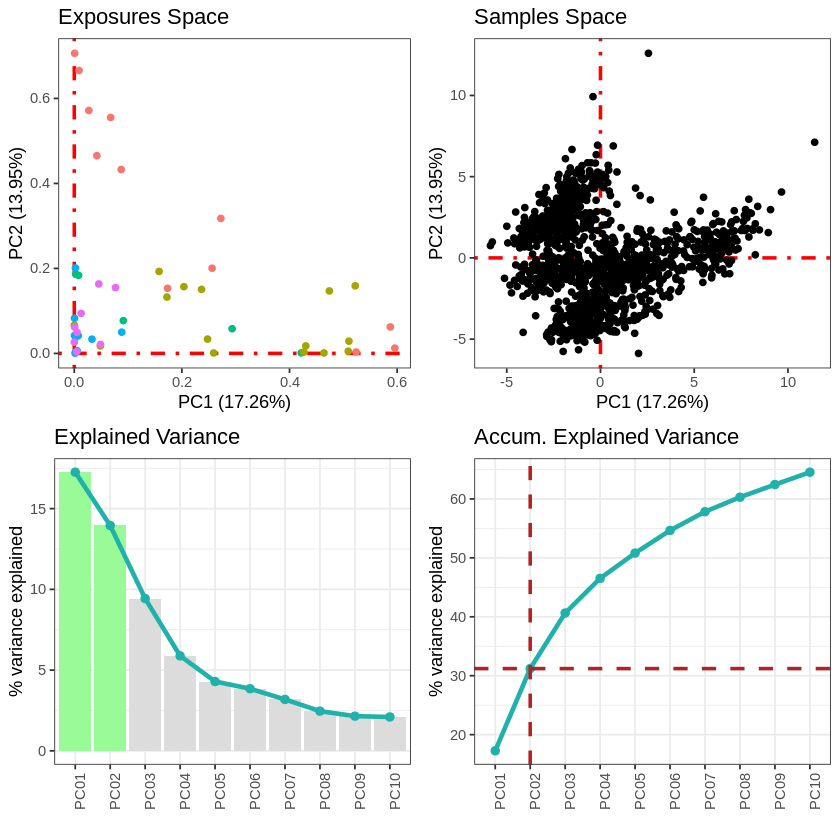

In [111]:
rexposome::plotPCA(exp_pca, set = "all")